# Activité 5 : séries temporelles

<img src="https://cdn.pixabay.com/photo/2013/07/12/16/01/clock-150754_1280.png" alt="horloge" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

### Code pour indiquer l'importance des notions traitées dans cette activité

- #### 🥇 : connaissance fondamentale pour l'analyse de données
- #### 🥈 : connaissance importante pour l'analyse de données
- #### 🥉 : connaissance moins importante pour l'analyse de données
> Si rien n'est indiqué, il s'agit de connaissances fondamentales pour l'analyse de données

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Qu'est-ce qu'une moyenne mobile ? A quoi cela sert-il ?
___
La moyenne mobile est calculée en **faisant "glisser" une fenêtre de temps** sur la série temporelle et en calculant la moyenne. Cela permet de **lisser les données**.

Source : https://fr.wikipedia.org/wiki/Moyenne_mobile
___
### - Qu'est-ce qu'une interpolation ?
___
L'**interpolation** permet de faire de l'**imputation** de données manquantes à partir des points présents dans le jeu de données de séries temporelles.

Source : https://fr.wikipedia.org/wiki/Interpolation_num%C3%A9rique
___
### - Qu'est-ce qu'une série temporelle stationnaire ?
___
La **moyenne**, la **variance** et l'**autocorrélation** ne doivent pas être dépendants du temps.

Source : https://moncoachdata.com/blog/modele-arima-avec-python/
___
### - A quoi sert le modèle ARIMA ?
___
Le **modèle ARIMA** permet de faire de la **prédiction avec des séries temporelles**. Il a une partie qui se base sur de l'**autorégression** et une partie sur des **moyennes mobiles**.

Source : https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average
___

## ✏️ Activités

Le jeu de données que l'on va utiliser pour cette activité contient les **températures moyennes** dans **différents pays** sur plusieurs **centaines d'années**.

### Analyse exploratoire des données temporelles

- **Récupérer** dans un **dataframe** Pandas les données du fichier "GlobalTemp.csv"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("GlobalTemp.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


- A partir des **données d'origine**, sélectionner uniquement les **données pour la France**. Conserver uniquement les colonnes "dt" et "AverageTemperature"

In [3]:
df_france = df[df["Country"]=="France"]
df_france = df_france[["dt", "AverageTemperature"]]
df_france

,dt,AverageTemperature
184353,1743-11-01,10.203
184354,1743-12-01,NaN
184355,1744-01-01,NaN
184356,1744-02-01,NaN
184357,1744-03-01,NaN
...,...,...
187587,2013-05-01,13.763
187588,2013-06-01,17.750
187589,2013-07-01,21.817
187590,2013-08-01,20.366


- **Transformer** la colonne "dt" en **datetime**. Passer la colonne "dt" en **index** et supprimer la colonne "dt"

In [4]:
df_france["dt"] = pd.to_datetime(df_france["dt"])
df_france.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 184353 to 187591
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   dt                  3239 non-null   datetime64[ns]
 1   AverageTemperature  3166 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.9 KB


In [5]:
df_france = df_france.set_index("dt")
df_france.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3239 entries, 1743-11-01 to 2013-09-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  3166 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB


- Tracer le graphique **des températures en fonction du temps**

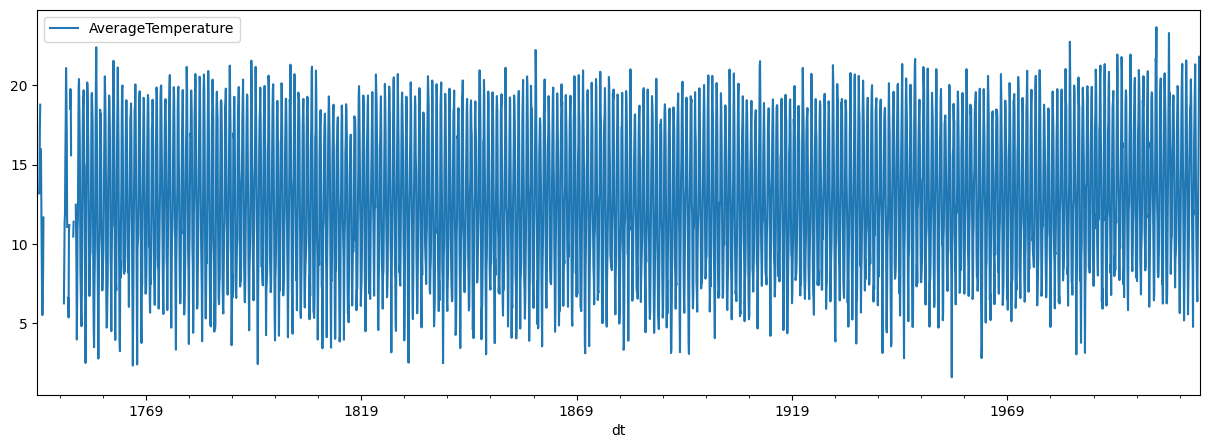

In [6]:
df_france.plot(figsize=(15, 5))
plt.show()

- Calculer le **nombre de valeurs manquantes** ainsi que les **dates de ces valeurs manquantes**

In [7]:
df_france.isna().sum()

AverageTemperature    73
dtype: int64

In [8]:
df_france[df_france.isna().all(1)].index

DatetimeIndex(['1743-12-01', '1744-01-01', '1744-02-01', '1744-03-01',
               '1744-08-01', '1745-05-01', '1745-06-01', '1745-07-01',
               '1745-08-01', '1745-09-01', '1745-10-01', '1745-11-01',
               '1745-12-01', '1746-01-01', '1746-02-01', '1746-03-01',
               '1746-04-01', '1746-05-01', '1746-06-01', '1746-07-01',
               '1746-08-01', '1746-09-01', '1746-10-01', '1746-11-01',
               '1746-12-01', '1747-01-01', '1747-02-01', '1747-03-01',
               '1747-04-01', '1747-05-01', '1747-06-01', '1747-07-01',
               '1747-08-01', '1747-09-01', '1747-10-01', '1747-11-01',
               '1747-12-01', '1748-01-01', '1748-02-01', '1748-03-01',
               '1748-04-01', '1748-05-01', '1748-06-01', '1748-07-01',
               '1748-08-01', '1748-09-01', '1748-10-01', '1748-11-01',
               '1748-12-01', '1749-01-01', '1749-02-01', '1749-03-01',
               '1749-04-01', '1749-05-01', '1749-06-01', '1749-07-01',
      

Pour l'**imputation des données manquantes** dans les **séries temporelles**, il existe des **méthodes spécifiques** de remplacement des valeurs manquantes.

- **Tracer la graphique** depuis l'**origine des données** jusqu'à **1753** (créer un nouveau dataframe). Effectuer le **remplacement des valeurs manquantes** par la **valeur précédente**, par la **valeur suivante** et par **interpolation linéaire**. Afficher les résultats sous forme de 4 graphiques superposés. Effectuer un **interpolation des valeurs manquantes** sur tout le jeu de données.

*Ressources :*

   - [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)
   - [pandas.DataFrame.interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [9]:
df_1753 = df_france.loc[:"1753"]
df_1753

,AverageTemperature
dt,
1743-11-01,10.203
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN
...,...
1753-08-01,18.394
1753-09-01,16.984
1753-10-01,13.365


In [10]:
df_1753_bfill = df_1753.fillna(method="bfill")
df_1753_ffill = df_1753.fillna(method="ffill")
df_1753_inter = df_1753.interpolate()

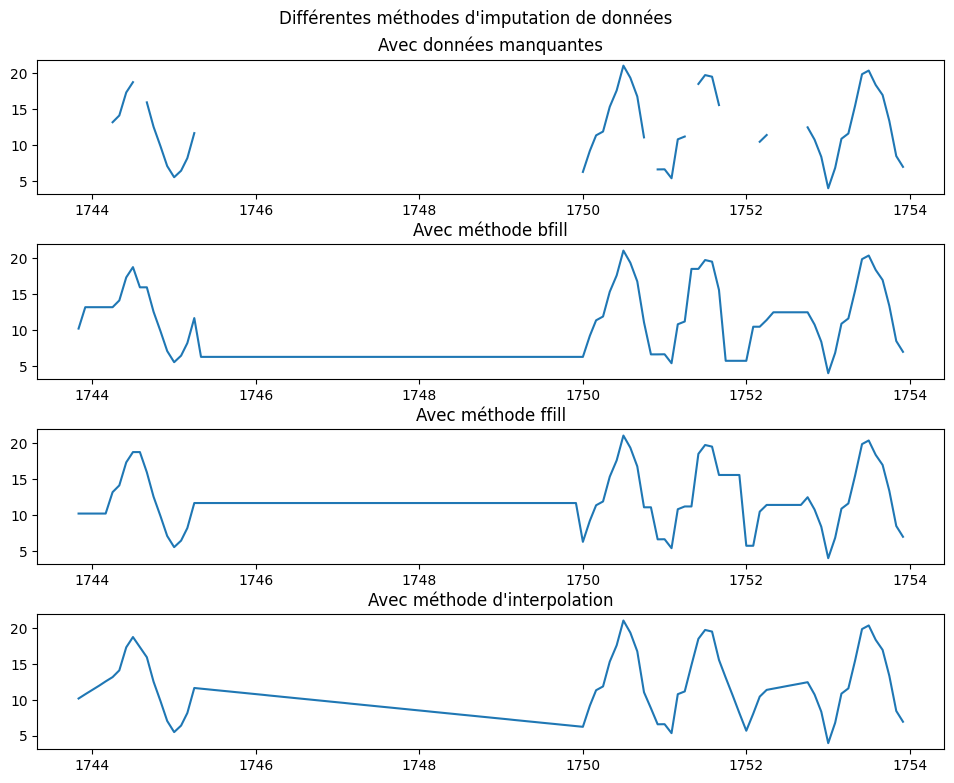

In [11]:
fig, axs = plt.subplots(4, figsize=(10, 8))
fig.suptitle("Différentes méthodes d'imputation de données")
fig.tight_layout(pad=1.5)
axs[0].plot(df_1753)
axs[0].set_title('Avec données manquantes')
axs[1].plot(df_1753_bfill)
axs[1].set_title('Avec méthode bfill')
axs[2].plot(df_1753_ffill)
axs[2].set_title('Avec méthode ffill')
axs[3].plot(df_1753_inter)
axs[3].set_title("Avec méthode d'interpolation")
plt.show()

In [12]:
df_france = df_france.interpolate()

In [13]:
print("Vérification du nombre de valeurs manquantes")
df_france.isna().sum()

Vérification du nombre de valeurs manquantes


AverageTemperature    0
dtype: int64

- Tracer le graphique des **moyennes mobiles (moving averages)** à 365 jours. Analyser l'**impact du changement** de l'**intervalle de temps** sur le graphique.

*Ressources :*

   - [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

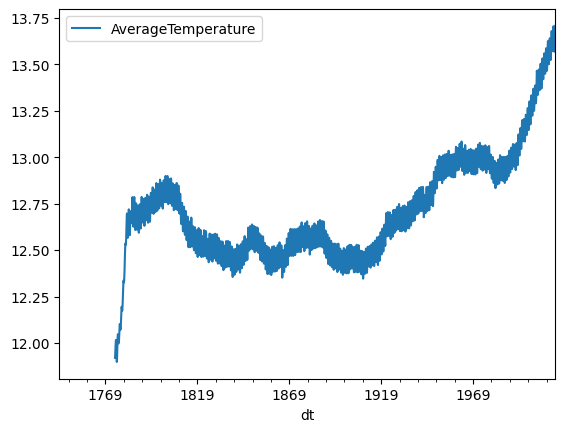

In [22]:
df_france.rolling(window=365).mean().plot()
plt.show()

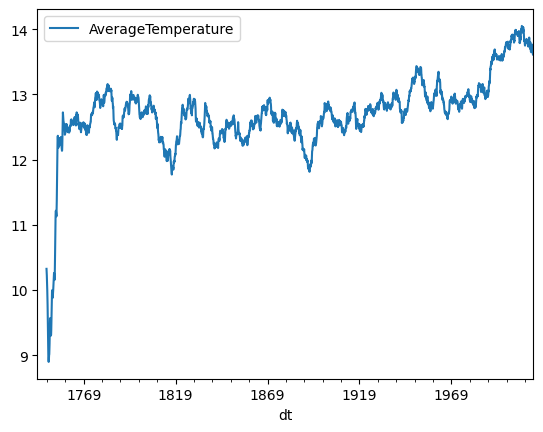

In [21]:
df_france.rolling(window=60).mean().plot()
plt.show()

- Afficher sur un **même graphique** les températures du **18ème siècle en rouge**, celles du **19ème en bleu**, celles du **20ème en vert** et celles du **21ème en noir**.

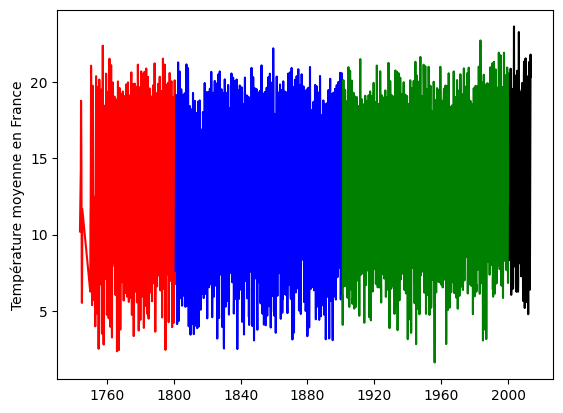

In [23]:
plt.plot(df_france.loc[:"1800"], color='red')
plt.plot(df_france.loc["1801":"1900"], color='blue')
plt.plot(df_france.loc["1901":"2000"], color='green')
plt.plot(df_france.loc["2001":], color='black')
plt.ylabel("Température moyenne en France")
plt.show()

- Effectuer un **test augmenté de Dickey-Fuller** (ADF) pour vérifier que la **série temporelle** est **stationnaire**.

Ressources : https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [24]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [25]:
result = adfuller(df_france)
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -6.088827347146673
p-value : 1.0484252665492853e-07
Valeurs Critiques :
	1%: -3.432388161120837
	5%: -2.862440536429695
	10%: -2.5672493755233123


- Séparer les données en un **jeu d'entrainement** et un **jeu de test** suivant l'**ordre chronologique**

In [26]:
df_train = df_france.loc[:"2011"]
df_test = df_france.loc["2012":]

- Entrainer un **modèle ARIMA** et effectuer le graphique pour comparer les **données réelles** et les **prédictions**

Ressources : https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html

D:\A_graver\Webforce3\Formation-DA-GEM-2022\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\A_graver\Webforce3\Formation-DA-GEM-2022\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\A_graver\Webforce3\Formation-DA-GEM-2022\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


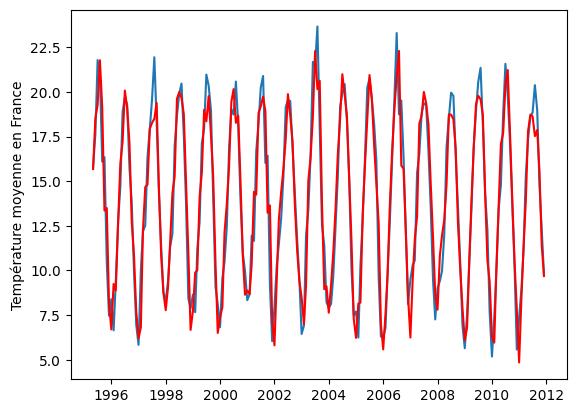

In [27]:
model = ARIMA(df_train, order=(2,1,2))
results = model.fit()
plt.plot(df_train.iloc[-200:])
plt.plot(results.fittedvalues.iloc[-200:], color='red')
plt.ylabel("Température moyenne en France")
plt.show()

- Calculer la **MAE**, **RMSE** et la **MAPE** pour le jeu de **données d'entrainement**

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [29]:
print(f"MAE = {mean_absolute_error(df_train, results.fittedvalues)}")
print(f"RMSE = {mean_squared_error(df_train, results.fittedvalues, squared=True)}")
print(f"MAPE = {mean_absolute_percentage_error(df_train, results.fittedvalues)}")

MAE = 1.2230550249028327
RMSE = 2.4752507449149386
MAPE = 0.1262364062657419


- Effectuer une **prédiction** sur **les données de test** et afficher le **graphique des données**. Calculer la **MAE**, **RMSE** et la **MAPE** pour le jeu de **données de test**

In [30]:
fig = results.predict(start="2012-01", end="2013-09")

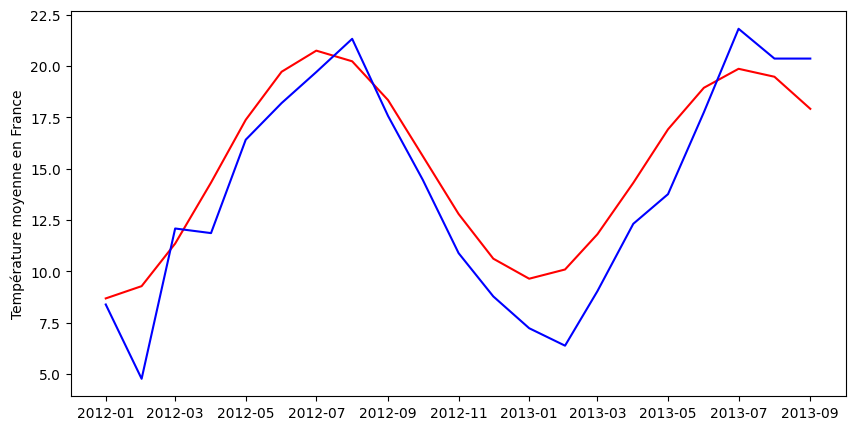

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(fig, "r")
plt.plot(df_test, "b")
plt.ylabel("Température moyenne en France")
plt.show()

In [32]:
print(f"MAE = {mean_absolute_error(df_test, fig)}")
print(f"RMSE = {mean_squared_error(df_test, fig, squared=True)}")
print(f"MAPE = {mean_absolute_percentage_error(df_test, fig)}")

MAE = 1.8484875776208445
RMSE = 4.510014309634787
MAPE = 0.1874059653433203


## 🚀 Pour aller plus loin

- [Série temporelle - Wikipedia](https://fr.wikipedia.org/wiki/S%C3%A9rie_temporelle)
- [Prophet library](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image par OpenClipart-Vectors de Pixabay